In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
music_df = pd.read_csv('../data/music.csv', header=None)

display(music_df.head())

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [9]:
missing_values = music_df.isnull().sum()
invalid_values = music_df.isna().sum()

print("Missing values:")
print(missing_values if missing_values.any() else "No missing values")

print("\nInvalid values:")
print(invalid_values if invalid_values.any() else "No invalid values")

Missing values:
No missing values

Invalid values:
No invalid values


In [10]:
most_variate_columns = pd.DataFrame(music_df.var().sort_values(ascending=False).head(10), columns=['Variance'], index=None)
display(most_variate_columns)
most_variate_columns = most_variate_columns.index.tolist()
top_5_columns = most_variate_columns[:5]

,Variance
69,2542.155206
68,340.750614
55,1.047359
10,1.044200
11,1.040040
59,1.036601
9,1.034569
44,1.032483
41,1.029139
48,1.028834


# Pre Processing

In [13]:
X_train, X_test = music_df[:int(len(music_df)*0.8)],music_df[int(len(music_df)*0.2):]

In [14]:
std_train_df = (X_train - X_train.mean()) / X_train.std()
std_test_df = (X_test - X_test.mean()) / X_test.std()
norm_train_df = (X_train - X_train.min()) / (X_train.max() - X_train.min())
norm_test_df = (X_test - X_test.min()) / (X_test.max() - X_test.min())

### Normalization vs. Standardization

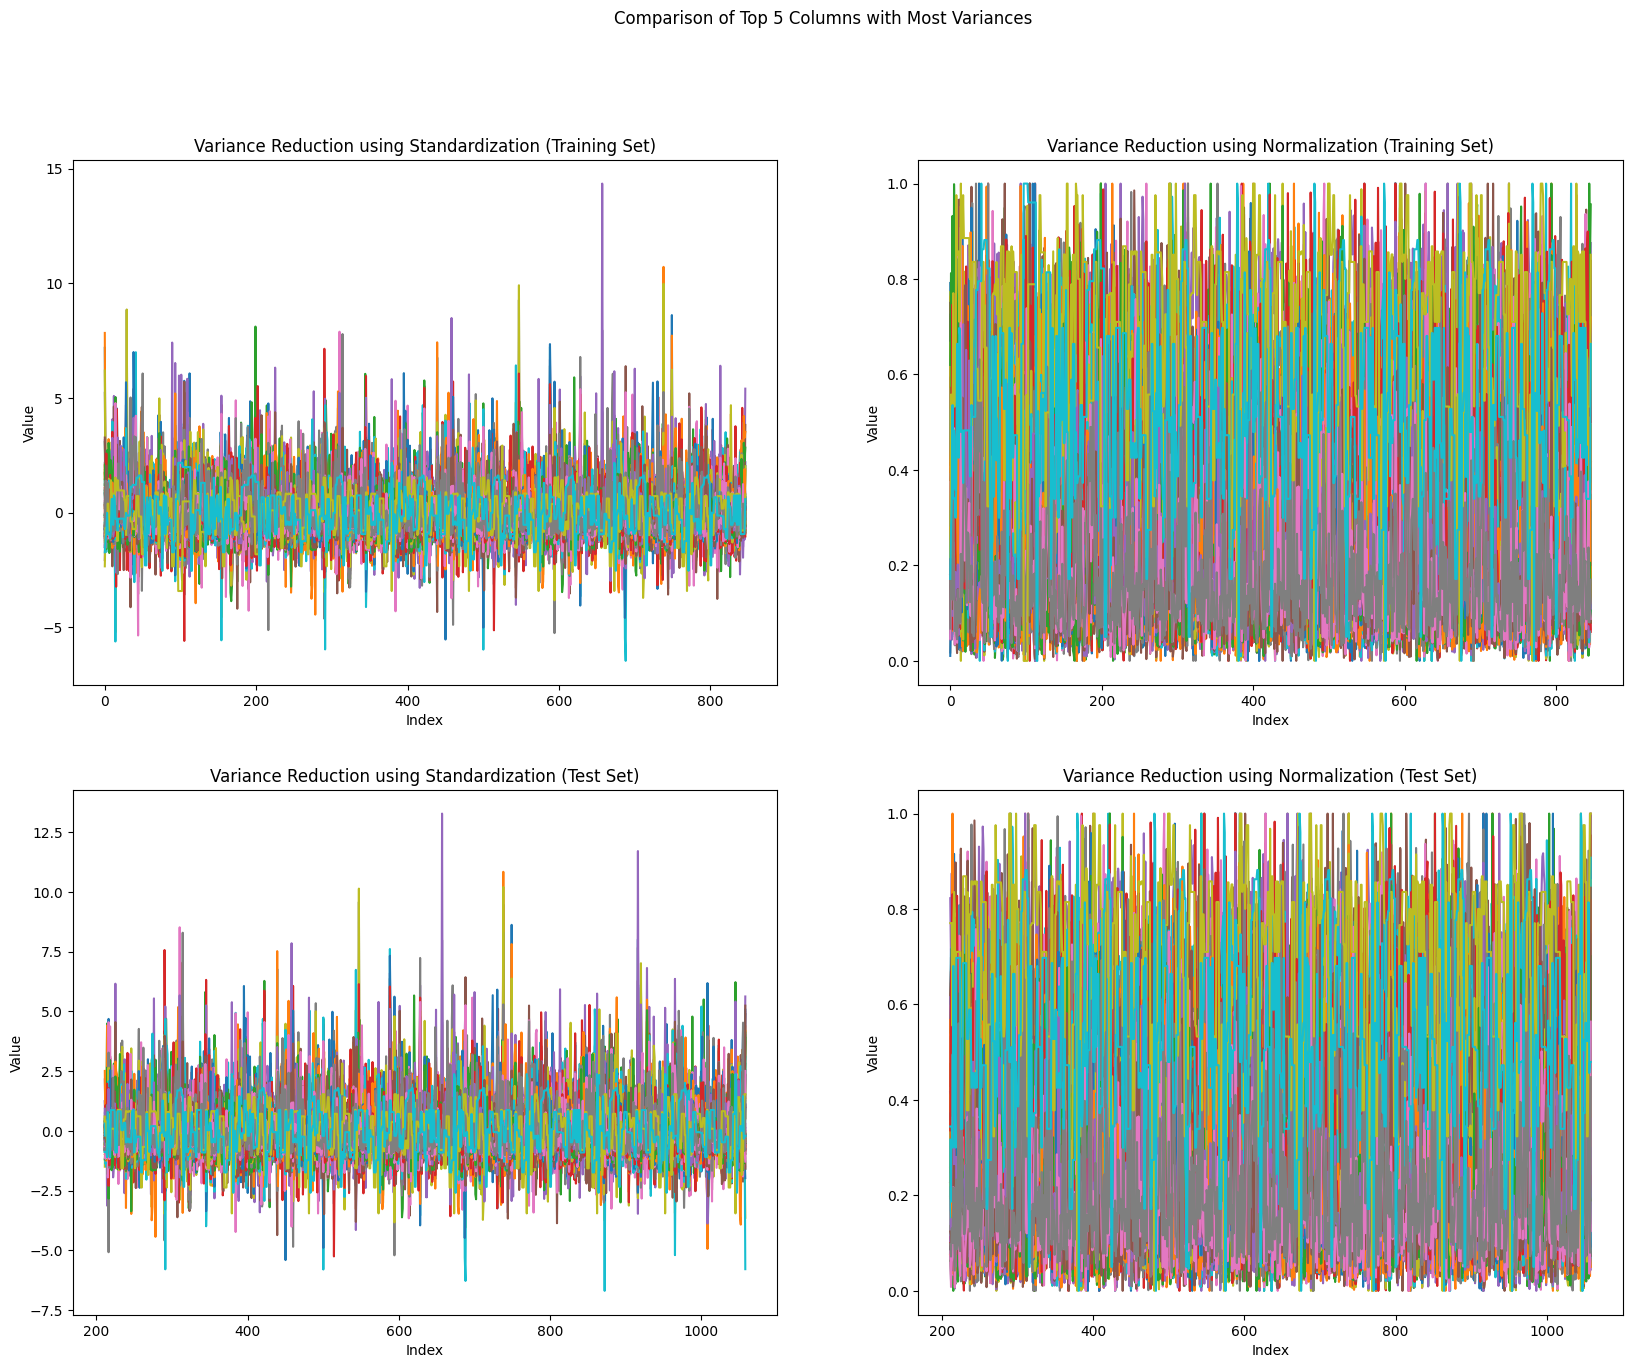

In [17]:
# Plot the columns in std_df and norm_df side by side
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Comparison of Top 5 Columns with Most Variances')

std_train_df.plot.line(ax=axes[0, 0])
axes[0][0].set_title('Variance Reduction using Standardization (Training Set)')
axes[0][0].set_xlabel('Index')
axes[0][0].set_ylabel('Value')
axes[0][0].legend().remove()

norm_train_df.plot.line(ax=axes[0, 1])
axes[0][1].set_title('Variance Reduction using Normalization (Training Set)')
axes[0][1].set_xlabel('Index')
axes[0][1].set_ylabel('Value')
axes[0][1].legend().remove()

std_test_df.plot.line(ax=axes[1, 0])
axes[1][0].set_title('Variance Reduction using Standardization (Test Set)')
axes[1][0].set_xlabel('Index')
axes[1][0].set_ylabel('Value')
axes[1][0].legend().remove()

norm_test_df.plot.line(ax=axes[1, 1])
axes[1][1].set_title('Variance Reduction using Normalization (Test Set)')
axes[1][1].set_xlabel('Index')
axes[1][1].set_ylabel('Value')
axes[1][1].legend().remove()

plt.show()
